In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
from os import path
from scipy.stats import binom
from utils import *

In [2]:
# Aggregate statistics for the two replicate sequencings of our Hnea library.
print('genome size: %d bp' % genome_size_bp)

print()
print('First replicate TN-Seq Mapping:')

mask = pool_df1.pos.notnull()
insertions_rep1 = pool_df1[mask].pos.values
n_ins_rep1 = len(insertions_rep1)
ins_rate_rep1 = (n_ins_rep1 / genome_size_bp)

print('rep1 number of insertions: %d' % n_ins_rep1)
print('rep1 insertion/bp: %.2f' % ins_rate_rep1)
print('rep1 bp/insertion: %.2f' % (genome_size_bp / n_ins_rep1))
print('Average insertions per gene rep1: %.2f' % rep_df1.inserts.mean())

print()
print('Second replicate TN-Seq Mapping:')

mask = pool_df2.pos.notnull()
insertions_rep2 = pool_df2[mask].pos.values
n_ins_rep2 = len(insertions_rep2)
ins_rate_rep2 = (n_ins_rep2 / genome_size_bp)

print('rep2 number of insertions: %d' % n_ins_rep2)
print('rep2 insertion/bp: %.2f' % ins_rate_rep2)
print('rep2 bp/insertion: %.2f' % (genome_size_bp/n_ins_rep2))

print('Average insertions per gene rep1: %.2f' % rep_df2.inserts.mean())

genome size: 2582886 bp

First replicate TN-Seq Mapping:
rep1 number of insertions: 102511
rep1 insertion/bp: 0.04
rep1 bp/insertion: 25.20
Average insertions per gene rep1: 37.89

Second replicate TN-Seq Mapping:
rep2 number of insertions: 99429
rep2 insertion/bp: 0.04
rep2 bp/insertion: 25.98
Average insertions per gene rep1: 36.74


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


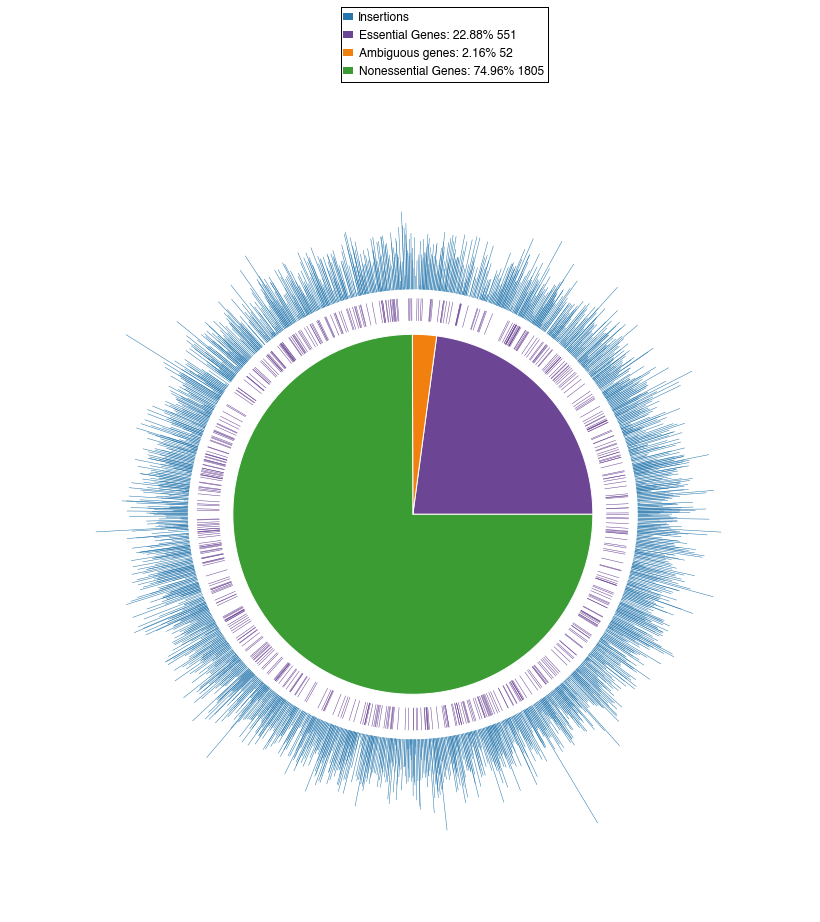

In [3]:
# Circular plot of insertions in the genome. 
iCol = qual_palette[1]
eCol = qual_palette[9]
nCol = qual_palette[3]
aCol = qual_palette[7]

fig = plt.figure(figsize=(10,10),frameon=False)
ax=fig.add_axes([0,0,1,1], polar=True)

plt.ylim(0,8)

mapped_ins = total_pool_df.pos.notnull()
all_insertions = total_pool_df[mapped_ins].pos.values
bins = range(0, int(all_insertions.max()) + 1000, 1000)

hist, bins = np.histogram(all_insertions, bins=bins)
heights = ((hist/max(hist))*3)+5
ax.vlines(bins, [5]*len(all_insertions),heights, colors=iCol,linewidth=0.5)

mask_essentials = essentiality_df.essentiality == 'essential'
mask_amb = essentiality_df.essentiality == 'ambiguous'
mask_nonessential = essentiality_df.essentiality == 'nonessential'

essentials = essentiality_df[mask_essentials]
essentials_pos = essentials.begin

length = len(essentials)
ax.vlines(essentials_pos, [4.8]*length,[4.3]*length, colors=eCol,linewidth=0.5)
ax.axis('off')


size = [4]*3
dat=np.array([mask_essentials.sum(), mask_amb.sum(), mask_nonessential.sum()])
widths=dat/sum(dat)*2*np.pi
datleft=np.append(0,np.cumsum(widths)[:-1])
ax.bar(left=datleft,width=widths,bottom=0,height=size,color=[eCol,aCol,nCol],
       edgecolor='w', linewidth=1, align="edge")

lw=7
perc=(dat/sum(dat))*100
legend_elements = [matplotlib.lines.Line2D([0], [0], color=iCol, lw=lw, label='Insertions'),
                   matplotlib.lines.Line2D([0], [0], color=eCol, lw=lw, label='Essential Genes: '+str(round(perc[0],2))+'% '+str(dat[0])),
                  matplotlib.lines.Line2D([0], [0], color=aCol, lw=lw, label='Ambiguous genes: '+str(round(perc[1],2))+'% '+str(dat[1])),
                  matplotlib.lines.Line2D([0], [0], color=nCol, lw=lw, label='Nonessential Genes: '+str(round(perc[2],2))+'% '+str(dat[2])),]
ax.legend(handles=legend_elements, handlelength=0.3,loc=[0.4,1.1])

plt.savefig('fig1/fig1B.eps', format='eps', bbox_inches='tight')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


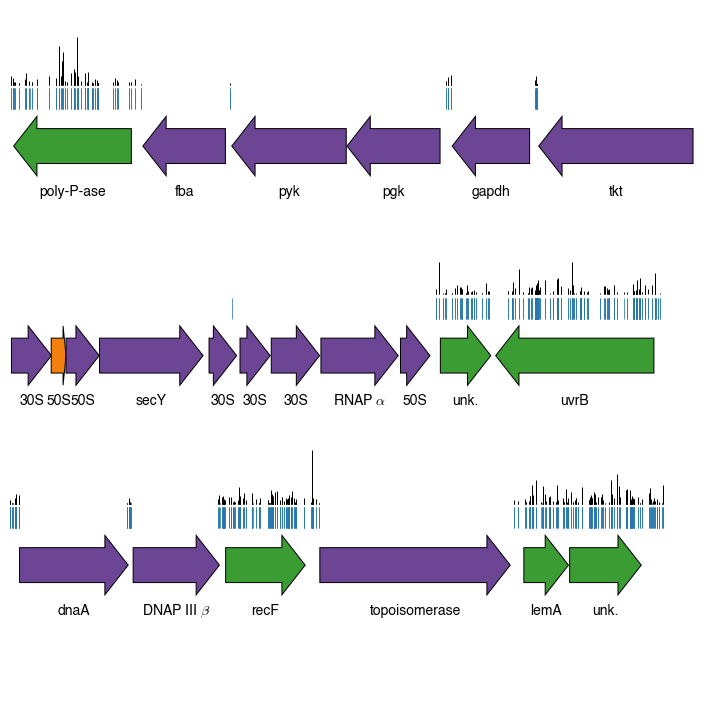

In [4]:
# Making Panel B

fig,ax = plt.subplots(figsize=(10,10), frameon=False)

plt.ylim(0,1)
ys = [0.2,0.5,0.8]
regions = [(0, 8000+500),
           (348299-3000, 350747+3000),
           (428269-6850, 430257)]
essentiality_colors = {
    'essential': qual_palette[9],
    'nonessential': qual_palette[3],
    'ambiguous': qual_palette[7]}
short_names = {
    'HNEAP_RS00015': 'dnaA', 
    'HNEAP_RS00020': 'DNAP III $\\beta$',
    'HNEAP_RS00025': 'recF',
    'HNEAP_RS00030': 'topoisomerase',
    'HNEAP_RS00035': 'lemA', 
    'HNEAP_RS00040': 'unk.',
    'HNEAP_RS01690': '30S',
    'HNEAP_RS01695': '50S',
    'HNEAP_RS01700': '50S',
    'HNEAP_RS01705': 'secY',
    'HNEAP_RS01710': '30S',
    'HNEAP_RS01715': '30S',
    'HNEAP_RS01720': '30S',
    'HNEAP_RS01725': 'RNAP $\\alpha$',
    'HNEAP_RS01730': '50S',
    'HNEAP_RS01735': 'unk.',
    'HNEAP_RS01740': 'uvrB',
    'HNEAP_RS02010': 'poly-P-ase',
    'HNEAP_RS02015': 'fba',
    'HNEAP_RS02020': 'pyk',
    'HNEAP_RS02025': 'pgk',
    'HNEAP_RS02030': 'gapdh',
    'HNEAP_RS02035': 'tkt'
}
insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

for y, region in zip(ys, regions):
    region_start, region_end = region
    region_length = region_end - region_start

    genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                      (essentiality_df.end <= region_end)]
    insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                     (total_pool_df.pos <= region_end)]

    for gene_idx in genes_in_region.index:
        gene = genes_in_region.loc[gene_idx]
        gene_name = short_names[gene.locusId]
        gene_length = gene.length_rep1
        gene_essentiality = essentiality_df.loc[gene_idx].essentiality
        length = gene_length * len_per_bp
        head_length = length*head_scale
        if length > 0.03:
            head_length = 0.03
        c = essentiality_colors[gene_essentiality]
        
        gene_start = gene.begin
        gene_end = gene.end
        gene_strand = gene.strand

        if gene_strand == '+':
            start = (gene_start - region_start)*len_per_bp
            genePic = matplotlib.patches.FancyArrow(
                start, y, length, 0,
                width=width, length_includes_head=True,
                head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
            ax.add_artist(genePic)
            plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
        else:
            start = (gene_end - region_start) * len_per_bp
            genePic = matplotlib.patches.FancyArrow(
                start, y, -length, 0,
                width=width, length_includes_head=True,
                head_width=headwidth,
                head_length=head_length, fill=True,facecolor=c)
            ax.add_artist(genePic)
            plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)

    poses = (insert_in_region.pos - region_start) * len_per_bp
    n_positions = len(poses)
    
    bottoms = [y+height+headwidth/2 + 0.045]*n_positions
    tops = bottoms + (height*insert_in_region.n_total)
    plt.vlines(poses, bottoms, tops, colors='k')

    bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
    tops = bottoms + 0.03
    plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

plt.savefig('fig1/fig1C.eps', format='eps', bbox_inches='tight')
plt.show()